# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Your code here
fraud = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [11]:
fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [16]:
fraud.describe().round(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6.362620e+06,6.362620e+06,6362620.00,6362620.0
mean,243.40,179861.90,833883.10,855113.67,1.100702e+06,1.224996e+06,0.00,0.0
std,142.33,603858.23,2888242.67,2924048.50,3.399180e+06,3.674129e+06,0.04,0.0
min,1.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
25%,156.00,13389.57,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
50%,239.00,74871.94,14208.00,0.00,1.327057e+05,2.146614e+05,0.00,0.0
75%,335.00,208721.48,107315.18,144258.41,9.430367e+05,1.111909e+06,0.00,0.0
max,743.00,92445516.64,59585040.37,49585040.37,3.560159e+08,3.561793e+08,1.00,1.0


In [5]:
fraud.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


### What is the distribution of the outcome? 

0    6354407
1       8213
Name: isFraud, dtype: int64


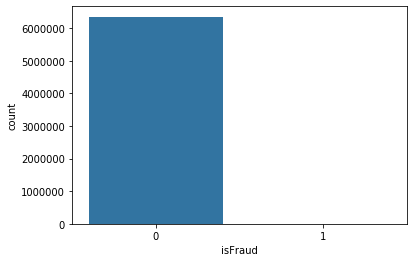

In [8]:
# Your response here
sns.countplot(fraud.isFraud)
print(fraud.isFraud.value_counts())

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [15]:
# Your code here
fraud.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Run a logisitc regression classifier and evaluate its accuracy.

In [19]:
# Your code here

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.utils import resample

In [20]:
# separate minority and majority classes

non_fraud = fraud[fraud['isFraud']==0]

is_fraud = fraud[fraud['isFraud']==1]


# downsample non occupied sample

non_fraud_downsampled = resample(non_fraud, replace = False, # sample without replacement

                    n_samples = len(is_fraud), # match minority n

                                random_state = 42) # reproducible results

# combine minority and downsampled majority

downsampled = pd.concat([non_fraud_downsampled, is_fraud])

# checking counts

downsampled["isFraud"].value_counts()


1    8213
0    8213
Name: isFraud, dtype: int64

In [23]:
downsampled.drop()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1777056,162,CASH_OUT,183806.32,C691771226,19391.00,0.00,C1416312719,382572.19,566378.51,0,0
1350600,137,PAYMENT,521.37,C203378011,0.00,0.00,M42773300,0.00,0.00,0,0
1991933,179,PAYMENT,3478.18,C1698571270,19853.00,16374.82,M643984524,0.00,0.00,0,0
5092368,355,PAYMENT,1716.05,C913764937,5769.17,4053.13,M1387429131,0.00,0.00,0,0
5066515,354,CASH_IN,253129.93,C2017736577,1328499.49,1581629.42,C407484102,2713220.48,2460090.55,0,0


In [24]:

y = downsampled['isFraud']

X = downsampled.drop(columns=['isFraud',"type","nameOrig","nameDest"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

#Train the classifier.
lr = LogisticRegression()
log_mod = lr.fit(X_train,y_train)

y_pred = log_mod.predict(X_test)



acc = log_mod.score(X_test,y_test)*100

print(f"Test Accuracy {round(acc, 2)}%")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test Accuracy 90.47%


### Now pick a model of your choice and evaluate its accuracy.

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
# Your code here

lr = DecisionTreeClassifier()
log_mod = lr.fit(X_train,y_train)

y_pred = log_mod.predict(X_test)



acc = log_mod.score(X_test,y_test)*100

print(f"Test Accuracy {round(acc, 2)}%")


Test Accuracy 99.06%


### Which model worked better and how do you know?

In [2]:
# Your response here
#by the accuracy metrics the decision tree worked better